<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [40]:
data = pd.read_csv('train.csv')
print(data.shape)
train = data.iloc[0:1000,:]
print(train.shape)
train.to_json('housedata.json')
train.head()


(1460, 81)
(1000, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [41]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

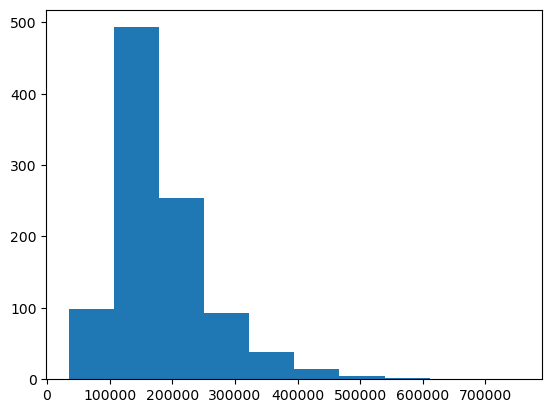

In [42]:
# plot hist
plt.hist(train['SalePrice'])

In [43]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1000, 38)

In [44]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
# cast to list
cols = cols.tolist()

In [45]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198
...,...,...
995,4,1230
996,5,1050
997,6,1442
998,3,1077


In [46]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [59]:
# How good is the model
print('The model R^2 is:',model.score(X,Y)) 
#The rmse is:
print('The rmse is:',mean_squared_error(Y, predictions))


The model R^2 is: 0.7343304388096177
The rmse is: 1710973758.2375526


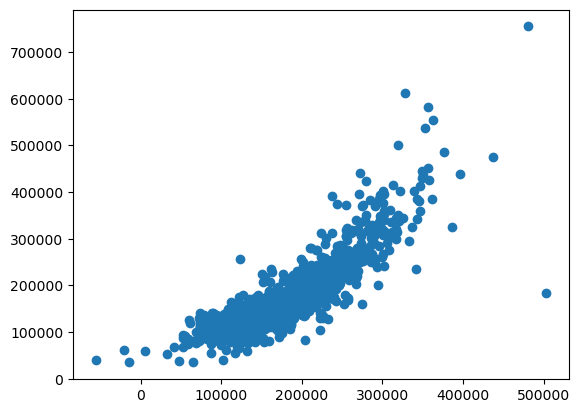

In [48]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [49]:
#read test data
test = data.iloc[1000:,:]
print(test.shape)
test.head()

(460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000
1001,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,86000
1002,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
1003,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905
1004,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,181000


In [50]:
#build test data X and Y
X_test = test[cols] #choose same cols as train
Y_test = test['SalePrice'] #SalePrice is Y
X_test = X_test.drop(['SalePrice'], axis = 1) #drop SalePrice from X to be able to predict
X_test


,OverallQual,GrLivArea
1000,3,944
1001,5,691
1002,8,1574
1003,5,1680
1004,7,1504
...,...,...
1455,6,1647
1456,6,2073
1457,7,2340
1458,5,1078


In [51]:
#predict on test data
predictions_test = model.predict(X_test)
#save predictions to csv
predictions_test = pd.DataFrame(predictions_test, columns=['SALEPRICE'])
predictions_test.index.name = 'ID'
predictions_test.to_csv('predictions.csv')
predictions_test.head()

,SALEPRICE
ID,
0,46273.217020
1,95176.066111
2,246764.111542
3,156461.769323
4,210136.103901


In [52]:
# How good is the model on test data
print('The R^2 value is:', model.score(X_test,Y_test))
#calculate RMSE
rms = sqrt(mean_squared_error(Y_test, predictions_test))
print('The root mean suqared error is:', rms)

The R^2 value is: 0.6619838806901366
The root mean suqared error is: 45048.91581348541


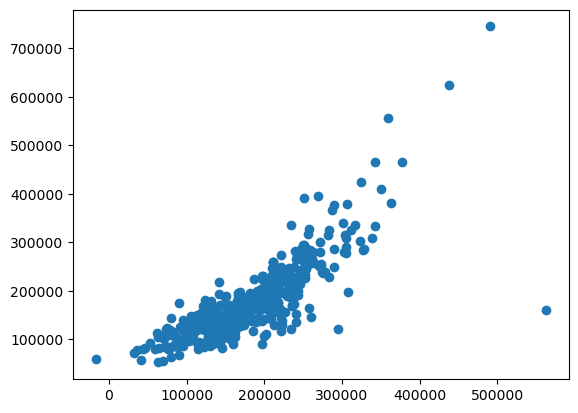

In [53]:
# Scatter plot of predictions
plt.scatter(predictions_test, Y_test)